<a href="https://www.kaggle.com/code/sahilr05/youtube-eda?scriptVersionId=104626302" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler # For Normalie values
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-statistics/videos-stats.csv
/kaggle/input/youtube-statistics/comments.csv


In [2]:
# Import Data
data = pd.read_csv("/kaggle/input/youtube-statistics/videos-stats.csv")
comm = pd.read_csv("/kaggle/input/youtube-statistics/comments.csv")

In [3]:
data.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [4]:
comm.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [5]:
# Drop Unnecessary columns in Video Dataset
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
# Drop Unnecessary columns in Comment Dataset
comm.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
# Find & Remove Duplicate Data
data.duplicated().sum() , comm.duplicated().sum()

(0, 148)

In [8]:
comm.drop_duplicates(inplace=True)

In [9]:
# Combine Both DataSet
data2 = pd.merge(left=data,right=comm,on="Video ID")

In [10]:
data2.sample(3)

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
11567,O Vídeo Mais Visto de Minecraft!,F530cN4t4-I,2022-08-24,minecraft,28878.0,605.0,544761.0,Espero que os antigos canais voltam a fazer ví...,9.0,1.0
13401,Bible among challenged books school district i...,H21zuMPXbkA,2022-08-18,cnn,1862.0,4996.0,148992.0,"""People who begin by burning books will end by...",14.0,0.0
9252,MOST POPULAR FOOD FOR ASMR + ALFREDO SAUCE (MO...,uRM0yMF0AtQ,2019-10-20,food,371116.0,13239.0,17069830.0,All that food looks delicious ❤,7.0,2.0


In [11]:
data2["Sentiment"].value_counts()

2.0    11401
1.0     4646
0.0     2340
Name: Sentiment, dtype: int64

In [12]:
# Data Related With Sentiment
data2.corr()["Sentiment"].sort_values(ascending=False)

Sentiment    1.000000
Likes_x      0.019256
Views        0.009925
Comments     0.007544
Likes_y     -0.028018
Name: Sentiment, dtype: float64

<AxesSubplot:>

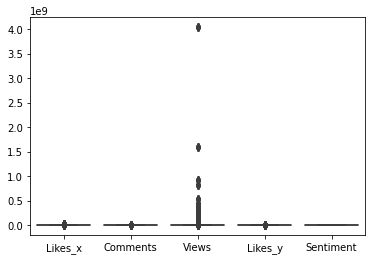

In [13]:
sns.boxplot(data=data2)

<AxesSubplot:xlabel='Views', ylabel='Likes_x'>

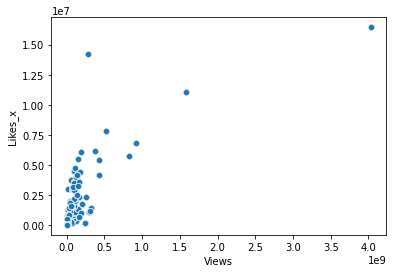

In [14]:
sns.scatterplot(x=data2["Views"],y=data2["Likes_x"])

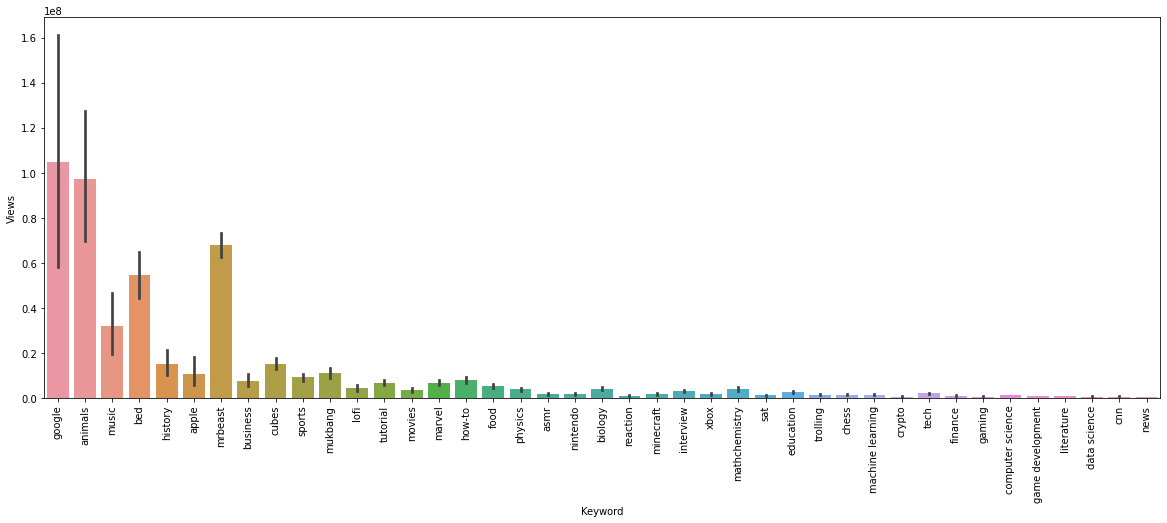

In [15]:
# Most Used Keyword base on views
plt.figure(figsize=(20,7))
sns.barplot(x="Keyword",y="Views",data=data2.sort_values(by="Views",ascending=False))
plt.xticks(rotation=90)
plt.show()

In [16]:
# Keyword Use list
data2["Keyword"].value_counts()

reaction            507
tutorial            501
game development    500
physics             500
asmr                500
trolling            500
cubes               499
interview           499
cnn                 497
history             496
machine learning    495
marvel              492
data science        492
sat                 490
mrbeast             489
xbox                488
minecraft           486
nintendo            480
how-to              479
food                479
computer science    475
tech                473
biology             470
sports              465
business            458
crypto              457
chess               457
mukbang             450
google              444
literature          441
bed                 435
music               429
movies              428
apple               419
gaming              407
lofi                384
animals             370
news                364
finance             319
education           240
mathchemistry       133
Name: Keyword, d

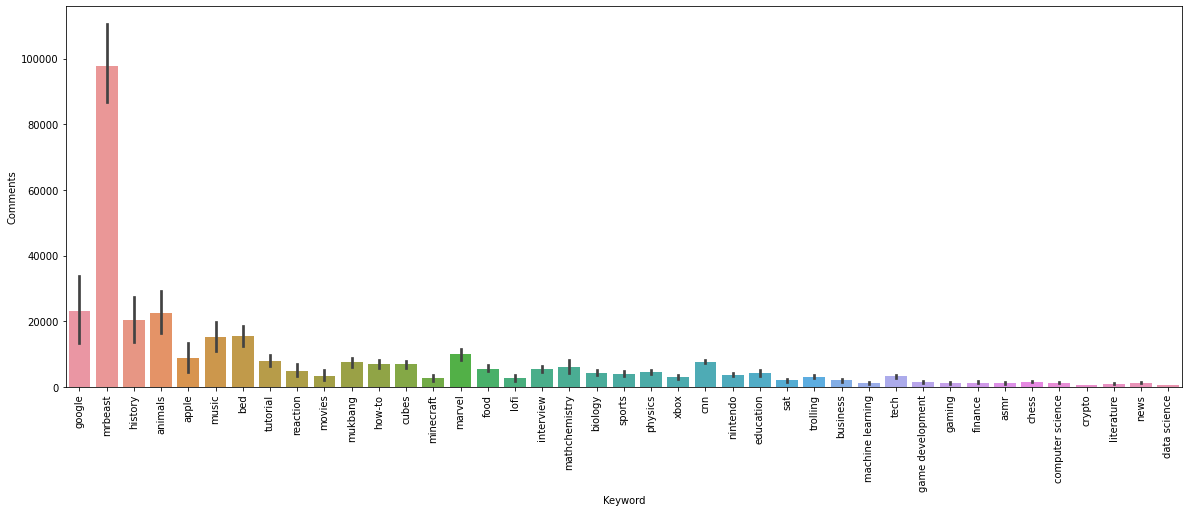

In [17]:
plt.figure(figsize=(20,7))
sns.barplot(x="Keyword",y="Comments",data=data2.sort_values(by="Comments",ascending=False))
plt.xticks(rotation=90)
plt.show()

In [18]:
# Top 5 Comment 
data2.sort_values(by="Comments",ascending=False)["Comment"].head()

5379                                 0:01 melhor parte kk
5383    i remember when this first came out and i kept...
5381                                   Really Enjoyed it!
5380    I listened to this before and now I’m listenin...
5378    22/08/2022. Nostalgia de Respeito e Maravilhos...
Name: Comment, dtype: object

In [19]:
data2.describe()

,Likes_x,Comments,Views,Likes_y,Sentiment
count,1.836700e+04,18367.000000,1.836700e+04,18387.000000,18387.000000
mean,1.758958e+05,8115.041651,1.184928e+07,1051.613423,1.492794
std,8.089415e+05,38402.575655,1.096406e+08,10678.606026,0.710284
min,-1.000000e+00,-1.000000,2.500000e+01,0.000000,0.000000
25%,2.923000e+03,219.000000,9.363300e+04,5.000000,1.000000
50%,1.542500e+04,864.000000,6.137570e+05,29.000000,2.000000
75%,6.200900e+04,3491.000000,2.872679e+06,192.000000,2.000000
max,1.644556e+07,732818.000000,4.034122e+09,891372.000000,2.000000


In [20]:
# Normalized Vlaue
scale = MinMaxScaler()
data2[["Likes_x","Comments","Views","Likes_y","Sentiment"]]= scale.fit_transform(data2[["Likes_x","Comments","Views","Likes_y","Sentiment"]])

In [21]:
data2.head()

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Let's not forget that Apple Pay in 2014 requir...,0.000107,0.5
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Here in NZ 50% of retailers don’t even have co...,0.000021,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,I will forever acknowledge this channel with t...,0.000181,1.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Whenever I go to a place that doesn’t take App...,0.000009,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,"Apple Pay is so convenient, secure, and easy t...",0.000038,1.0


In [22]:
data2.describe()

,Likes_x,Comments,Views,Likes_y,Sentiment
count,18367.000000,18367.000000,18367.000000,18387.000000,18387.000000
mean,0.010696,0.011075,0.002937,0.001180,0.746397
std,0.049189,0.052404,0.027178,0.011980,0.355142
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000178,0.000300,0.000023,0.000006,0.500000
50%,0.000938,0.001180,0.000152,0.000033,1.000000
75%,0.003771,0.004765,0.000712,0.000215,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
data2.isnull().sum()

Title            0
Video ID         0
Published At     0
Keyword          0
Likes_x         20
Comments        20
Views           20
Comment          1
Likes_y          0
Sentiment        0
dtype: int64

In [24]:
data2.dropna(inplace=True)

In [25]:
data2.shape

(18366, 10)

In [26]:
# Max Video Upload Date
data2["Published At"].value_counts().sort_values(ascending=False).head()

2022-08-24    2722
2022-08-23    1741
2022-08-22     366
2022-08-20     361
2022-08-21     347
Name: Published At, dtype: int64

In [27]:
# Max View Data
data["Views"].value_counts().sort_values(ascending=False).head()

1456270.0    2
95826.0      2
14537.0      2
51885.0      2
1564007.0    2
Name: Views, dtype: int64

In [28]:
data2["Title"]

0        Apple Pay Is Killing the Physical Wallet After...
1        Apple Pay Is Killing the Physical Wallet After...
2        Apple Pay Is Killing the Physical Wallet After...
3        Apple Pay Is Killing the Physical Wallet After...
4        Apple Pay Is Killing the Physical Wallet After...
                               ...                        
18362    Andrew Ng: Deep Learning, Education, and Real-...
18363    Andrew Ng: Deep Learning, Education, and Real-...
18364    Andrew Ng: Deep Learning, Education, and Real-...
18365    Andrew Ng: Deep Learning, Education, and Real-...
18366    Andrew Ng: Deep Learning, Education, and Real-...
Name: Title, Length: 18366, dtype: object

In [29]:
# Max Views video Title
data.groupby("Title")["Views"].value_counts().sort_values(ascending=False).head()

Title                                                                                          Views    
🚨 DÉPÊCHEZ-VOUS 🚨 Ces PROMOS disparaissent bientôt du PS Store, Xbox Store, Nintendo eShop...  13184.0      2
My New House Gaming Setup is SICK!                                                             1564007.0    2
I OPENED MY OWN ARCADE SHOP                                                                    3773387.0    2
20 Minecraft Block Facts You Maybe Didn&#39;t Know                                             1204024.0    2
The History Of Chess: A Reflection Of Us                                                       51885.0      2
Name: Views, dtype: int64

In [30]:
# Most Like 5 Keyword & based on keyword video like
data2.groupby("Keyword").aggregate('mean').sort_values(by="Likes_x", ascending=False).head()

,Likes_x,Comments,Views,Likes_y,Sentiment
Keyword,,,,,
mrbeast,0.130302,0.133508,0.016852,0.016140,0.822086
animals,0.047510,0.030654,0.024115,0.001422,0.762162
bed,0.029133,0.020953,0.013513,0.001161,0.835632
google,0.029037,0.031322,0.025969,0.000928,0.671171
music,0.023881,0.020784,0.007913,0.001098,0.867133


In [31]:
# Most Like 5 Keyword & based on Sentiment
data2.groupby("Keyword").aggregate('mean').sort_values(by="Sentiment", ascending=False).head()

,Likes_x,Comments,Views,Likes_y,Sentiment
Keyword,,,,,
lofi,0.004763,0.003497,0.001056,0.001122,0.915365
asmr,0.002227,0.001676,0.000423,0.000536,0.870000
music,0.023881,0.020784,0.007913,0.001098,0.867133
machine learning,0.002158,0.001686,0.000327,0.000379,0.866316
tutorial,0.010185,0.010811,0.001673,0.001276,0.857285


In [32]:
# Top 5 Keywords based on view
data2.groupby("Keyword").aggregate('mean').sort_values(by="Views", ascending=False).head()

,Likes_x,Comments,Views,Likes_y,Sentiment
Keyword,,,,,
google,0.029037,0.031322,0.025969,0.000928,0.671171
animals,0.047510,0.030654,0.024115,0.001422,0.762162
mrbeast,0.130302,0.133508,0.016852,0.016140,0.822086
bed,0.029133,0.020953,0.013513,0.001161,0.835632
music,0.023881,0.020784,0.007913,0.001098,0.867133


In [33]:
data2.head(2)

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Let's not forget that Apple Pay in 2014 requir...,0.000107,0.5
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Here in NZ 50% of retailers don’t even have co...,0.000021,0.0


<AxesSubplot:>

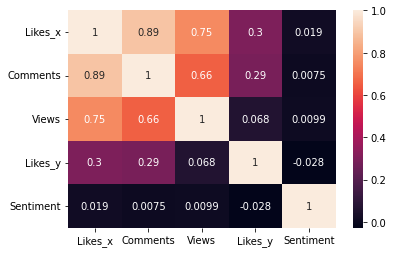

In [34]:
sns.heatmap(data2.corr(),annot=True)
# Like_x related to views      0.75
# Like_x related to comment    0.89
# Comments related to views    0.66
# Views related to Like_x      0.75

# Like_y Not Much Ratated to much - it's low correlated

In [35]:
data3 = data2.drop(["Published At","Video ID","Likes_y"],axis=1)

In [36]:
data3

,Title,Keyword,Likes_x,Comments,Views,Comment,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,tech,0.000207,0.000918,0.000034,Let's not forget that Apple Pay in 2014 requir...,0.5
1,Apple Pay Is Killing the Physical Wallet After...,tech,0.000207,0.000918,0.000034,Here in NZ 50% of retailers don’t even have co...,0.0
2,Apple Pay Is Killing the Physical Wallet After...,tech,0.000207,0.000918,0.000034,I will forever acknowledge this channel with t...,1.0
3,Apple Pay Is Killing the Physical Wallet After...,tech,0.000207,0.000918,0.000034,Whenever I go to a place that doesn’t take App...,0.0
4,Apple Pay Is Killing the Physical Wallet After...,tech,0.000207,0.000918,0.000034,"Apple Pay is so convenient, secure, and easy t...",1.0
...,...,...,...,...,...,...,...
18362,"Andrew Ng: Deep Learning, Education, and Real-...",machine learning,0.000316,0.000606,0.000056,As a GenX'er I enjoyed this interview so much....,1.0
18363,"Andrew Ng: Deep Learning, Education, and Real-...",machine learning,0.000316,0.000606,0.000056,I took Ng's class on Coursera years ago. It sw...,1.0
18364,"Andrew Ng: Deep Learning, Education, and Real-...",machine learning,0.000316,0.000606,0.000056,This man got a great voiceover career availabl...,1.0
18365,"Andrew Ng: Deep Learning, Education, and Real-...",machine learning,0.000316,0.000606,0.000056,This week has been awesome! First Scott Aarons...,1.0


In [37]:
# more in future...
# suggest something.